Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r'C:\Users\Satyam Singh\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train')
data_dir_test = pathlib.Path(r'C:\Users\Satyam Singh\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

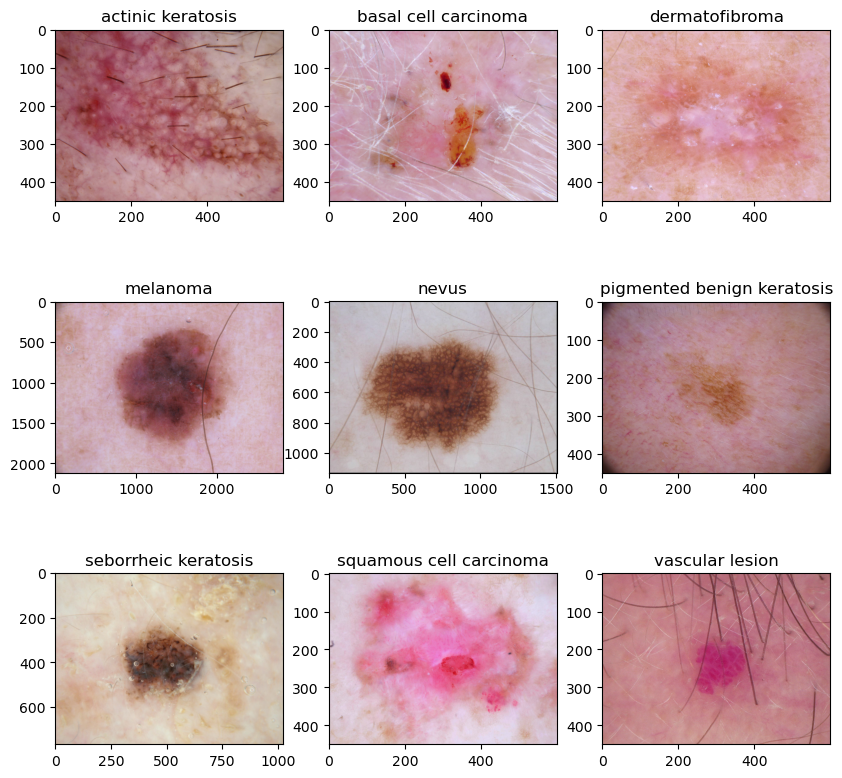

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):  # Iterate through the actual number of classes
    image_paths = list(data_dir_train.glob(class_names[i] + '/*.jpg'))
    if len(image_paths) > 0:  # Check if there are any images for this class
        image = plt.imread(str(image_paths[0]))  # Read the first image if available
        plt.subplot(3, 3, i + 1)
        plt.title(class_names[i])
        plt.imshow(image)
    else:
        print(f"No images found for class: {class_names[i]}")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
##### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling, Input
from tensorflow.keras.models import Sequential

num_classes = 9
img_height, img_width = 180, 180

# Create the CNN model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Rescaling(1./255)
])

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


### Compile the model


In [11]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │        69,705 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,497 (982.41 KB)

 Trainable params: 251,497 (982.41 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 438ms/step - accuracy: 0.1764 - loss: 2.0981 - val_accuracy: 0.1946 - val_loss: 2.1502
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 496ms/step - accuracy: 0.1929 - loss: 2.0595 - val_accuracy: 0.2058 - val_loss: 2.0256
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 463ms/step - accuracy: 0.2153 - loss: 2.0220 - val_accuracy: 0.2908 - val_loss: 1.8965
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 415ms/step - accuracy: 0.2714 - loss: 1.9132 - val_accuracy: 0.3199 - val_loss: 1.8651
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 408ms/step - accuracy: 0.3491 - loss: 1.7880 - val_accuracy: 0.4116 - val_loss: 1.6817
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 434ms/step - accuracy: 0.4265 - loss: 1.6189 - val_accuracy: 0.4362 - val_loss: 1.6068
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 416ms/step - accuracy: 0.4656 - loss: 1.5711 - val_accuracy: 0.4720 - val_loss: 1.5342
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 435ms/step - accuracy: 0.4958 - loss: 1.4771 - val_accu

### Visualizing training results

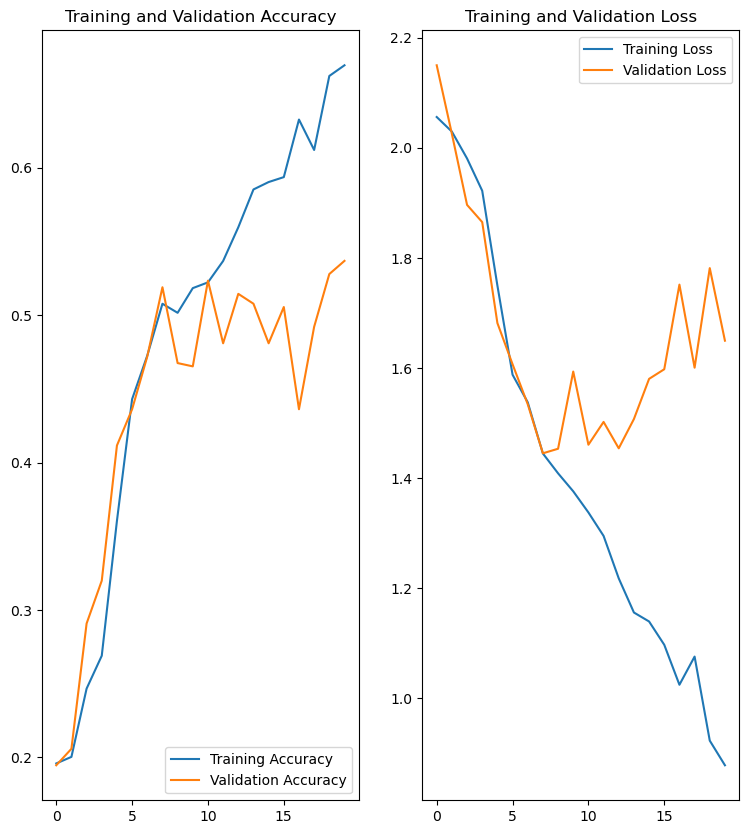

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(9, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



***Observations on the first base model***

**Accuracy Trends**:

The training accuracy improves steadily, reaching 67.8% by the end of 20 epochs.
Validation accuracy improves initially but fluctuates significantly in the later epochs, stabilizing at approximately 53.7% by the 20th epoch.
The gap between training and validation accuracy in later epochs suggests the model might be starting to overfit.

**Loss Trends**:
**Training loss** consistently decreases, showing effective optimization.
**Validation loss** initially decreases but fluctuates and begins increasing after epoch 8, peaking around epochs 16–19.
This trend of increasing validation loss is a clear sign of **overfitting**.

In [15]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

img_height, img_width = 180, 180

# Create the data augmentation strategy
data_augmentation = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define input shape here
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2, fill_mode='reflect'),
    layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

# Print summary of the data augmentation layers
data_augmentation.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 180, 180, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

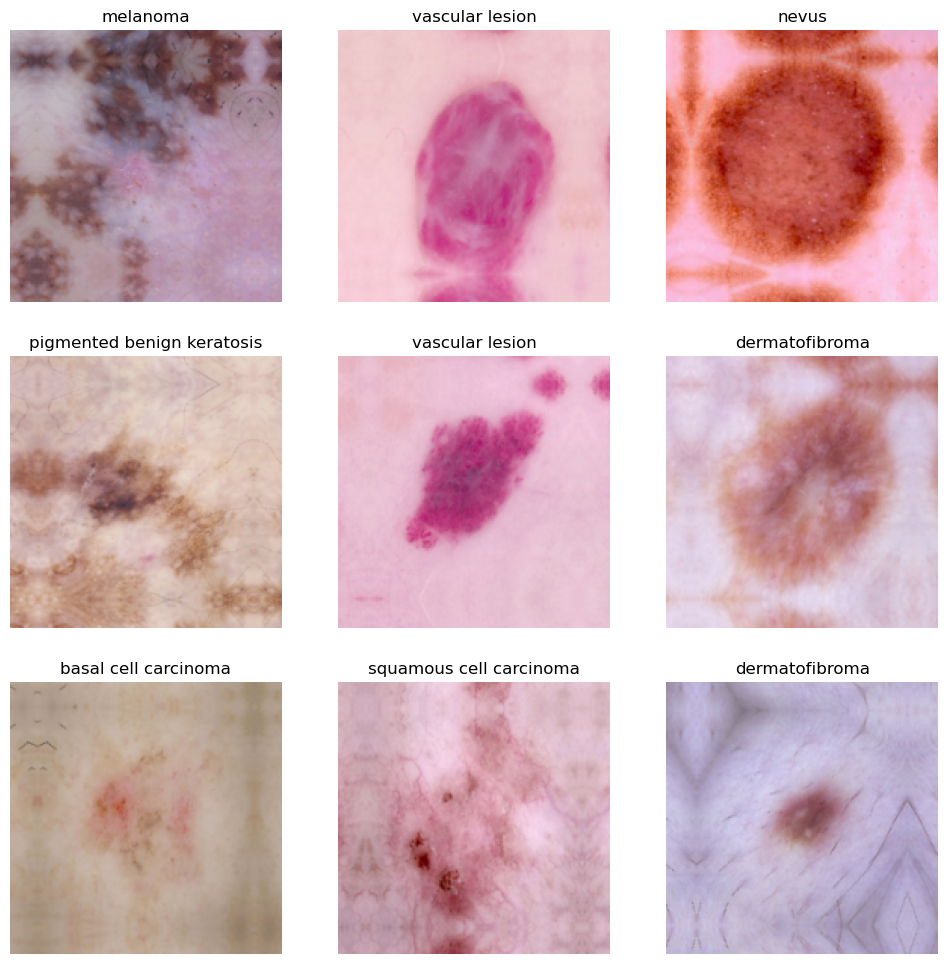

In [16]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [17]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling, Input
from tensorflow.keras.models import Sequential

num_classes = 9
img_height, img_width = 180, 180

# Data Augmentation strategy
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2, fill_mode='reflect'),
    layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

# Create the CNN model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    data_augmentation,
    Rescaling(1./255)
])
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Dropout Layer
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))


### Compiling the model

In [18]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Training the model

In [19]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 618ms/step - accuracy: 0.1915 - loss: 2.1467 - val_accuracy: 0.2371 - val_loss: 2.0285
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 655ms/step - accuracy: 0.1945 - loss: 2.0420 - val_accuracy: 0.2058 - val_loss: 2.0387
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 629ms/step - accuracy: 0.1942 - loss: 2.0189 - val_accuracy: 0.2707 - val_loss: 1.9216
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 630ms/step - accuracy: 0.2834 - loss: 1.9225 - val_accuracy: 0.2058 - val_loss: 2.0419
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 635ms/step - accuracy: 0.1870 - loss: 2.0170 - val_accuracy: 0.2058 - val_loss: 2.0273
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 601ms/step - accuracy: 0.2108 - loss: 1.9978 - val_accuracy: 0.1924 - val_loss: 2.0280
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 627ms/step - accuracy: 0.1905 - loss: 2.0163 - val_accuracy: 0.1924 - val_loss: 2.0330
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 628ms/step - accuracy: 0.1928 - loss: 2.0123 - val_accu

### Visualizing the results

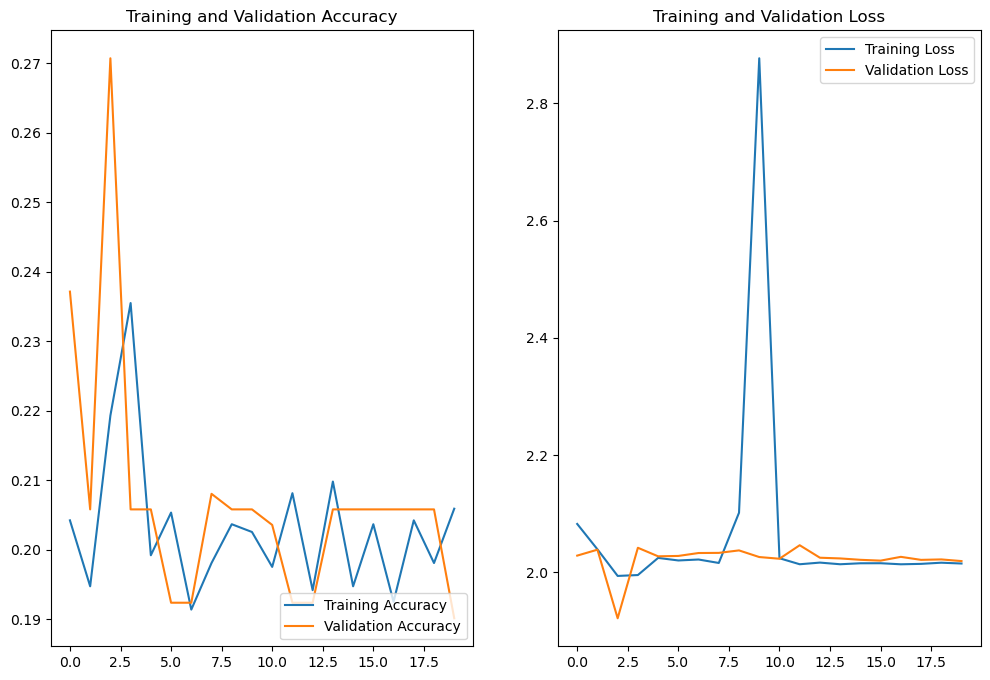

In [20]:
import matplotlib.pyplot as plt

# Extract values from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

# Set up the figure size and layout
plt.figure(figsize=(12, 8))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Observations from Second Model**

**Accuracy**

**Training Accuracy**:
The training accuracy remains consistently low, fluctuating around 19–21%, indicating that the model is struggling to learn patterns from the training data.
Despite 20 epochs of training, there is no significant improvement in training accuracy, suggesting underfitting.

**Validation Accuracy**:
The validation accuracy remains inconsistent throughout training. It fluctuates significantly, suggesting that the model struggles to generalize well to unseen data. Even toward the later epochs, the validation accuracy doesn’t show a clear improvement.

**Loss**

**Training Loss**:
Training loss shows a volatile pattern, with a significant spike around epoch 10. This instability may point to issues such as an improper learning rate or optimizer configuration.
Even though the training loss slightly reduces by the final epoch, it remains high and inconsistent, signaling inadequate feature learning.

**Validation Loss**:
Validation loss does not demonstrate significant improvement across epochs, remaining consistently high (~2.0).
The plateaued and erratic validation loss curve suggests the model is failing to generalize and may be stuck in a poor local minimum.


Therefore, we can say that Model performance indicates underfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
##### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [21]:
##
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
1,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
2,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
3,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
4,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
...,...,...
2234,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion
2235,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion
2236,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion
2237,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion


In [22]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
1,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
2,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
3,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
4,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
...,...,...
2234,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion
2235,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion
2236,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion
2237,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion


<BarContainer object of 9 artists>

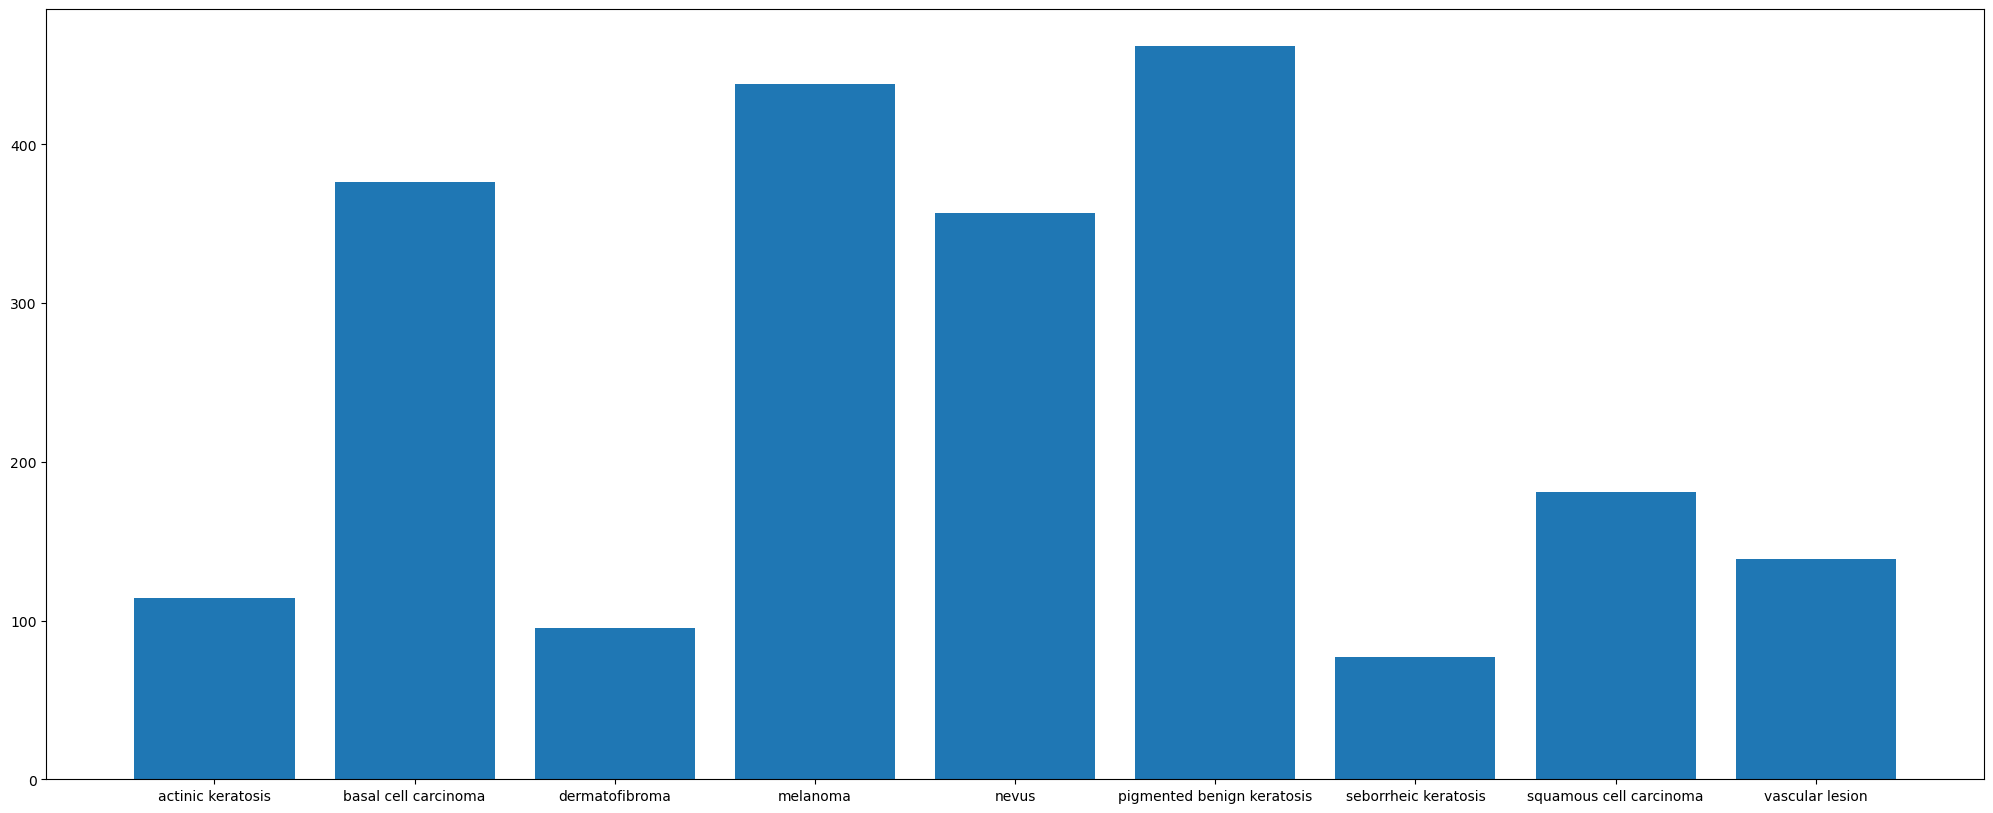

In [23]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
**Seborrheic keratosis** has the fewest samples, as indicated by the shortest bar.
#### - Which classes dominate the data in terms proportionate number of samples?
**Pigmented benign keratosis**, **Melanoma**, **Nevus** and **Basis Cell Carcinoma** dominates the number of samples in terms of proportion.


In [24]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
#path_to_training_dataset="/content/drive/MyDrive/J/Melonama Assignment/Melonama Files/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(f"C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/{i}", save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)


Initialised with 114 image(s) found.
Output directory set to C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24EDA812F50>: 100%|██████████| 500/500 [00:05<00:00, 92.98 Samples/s]                   


Initialised with 376 image(s) found.
Output directory set to C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24EDA6476D0>: 100%|██████████| 500/500 [00:05<00:00, 93.17 Samples/s]                   


Initialised with 95 image(s) found.
Output directory set to C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24ED9323390>: 100%|██████████| 500/500 [00:05<00:00, 98.37 Samples/s]                   


Initialised with 438 image(s) found.
Output directory set to C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x24EDA72CD50>: 100%|██████████| 500/500 [00:28<00:00, 17.48 Samples/s] 


Initialised with 357 image(s) found.
Output directory set to C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24EDA8C8090>: 100%|██████████| 500/500 [00:24<00:00, 20.39 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x24EDD6F1A50>: 100%|██████████| 500/500 [00:05<00:00, 88.91 Samples/s] 


Initialised with 77 image(s) found.
Output directory set to C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x24EDA6C5ED0>: 100%|██████████| 500/500 [00:13<00:00, 37.44 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24EDAA34150>: 100%|██████████| 500/500 [00:05<00:00, 91.51 Samples/s]                   


Initialised with 139 image(s) found.
Output directory set to C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24ED9255A50>: 100%|██████████| 500/500 [00:04<00:00, 103.66 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
import pathlib
# Go through each class-specific output directory and count images
augmented_image_count = 0
for class_name in class_names:
    data_dir_augmented = pathlib.Path(f"C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/{class_name}/output")
    augmented_image_count += len(list(data_dir_augmented.glob('*.jpg')))

print(augmented_image_count)

4500


In [28]:
##
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
1,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
2,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
3,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
4,C:\Users\Satyam Singh\Downloads\CNN_assignment...,actinic keratosis
...,...,...
2234,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion
2235,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion
2236,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion
2237,C:\Users\Satyam Singh\Downloads\CNN_assignment...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [30]:
batch_size = 32
img_height = 180
img_width = 180

In [31]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/J/Melonama Assignment/Melonama Files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
data_dir_train1=pathlib.Path(r"C:\Users\Satyam Singh\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")

In [32]:
data_dir_train1

WindowsPath('C:/Users/Satyam Singh/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

#### **Todo:** Create a training dataset

In [33]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [34]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling, Input

data_dir_train1 = pathlib.Path(r"C:\Users\Satyam Singh\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [36]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling, Input
from tensorflow.keras.models import Sequential
import pathlib

num_classes = 9
img_height, img_width = 180, 180
batch_size = 32  # Ensure batch size is set

# Create the CNN model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define input shape here
    Rescaling(1./255)  # Rescaling layer to normalize pixel values
])

# Adding the convolutional and pooling layers
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Adding dropout and flatten layers
model.add(Dropout(0.25))
model.add(Flatten())

# Adding the final dense layer
model.add(Dense(num_classes, activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [38]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [39]:
for images, labels in train_ds.take(1):
    print(labels)

tf.Tensor([2 8 3 3 5 4 1 2 3 8 6 7 0 1 2 5 8 4 1 7 5 7 3 0 8 4 6 2 7 4 2 2], shape=(32,), dtype=int32)


#### **Todo:**  Train your model

In [40]:
epochs =30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 112s 649ms/step - accuracy: 0.1407 - loss: 2.1974 - val_accuracy: 0.1455 - val_loss: 2.2137
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 131s 773ms/step - accuracy: 0.2037 - loss: 2.0576 - val_accuracy: 0.2873 - val_loss: 1.7797
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.3077 - loss: 1.7512 - val_accuracy: 0.3393 - val_loss: 1.8468
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 162s 960ms/step - accuracy: 0.3957 - loss: 1.5561 - val_accuracy: 0.3868 - val_loss: 1.6272
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 161s 954ms/step - accuracy: 0.4592 - loss: 1.3923 - val_accuracy: 0.4076 - val_loss: 1.5561
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 162s 962ms/step - accuracy: 0.4850 - loss: 1.3285 - val_accuracy: 0.5301 - val_loss: 1.2454
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 85s 500ms/step - accuracy: 0.5797 - loss: 1.1062 - val_accuracy: 0.5991 - val_loss: 1.0571
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 68s 401ms/step - accuracy: 0.6286 - loss

#### **Todo:**  Visualize the model results

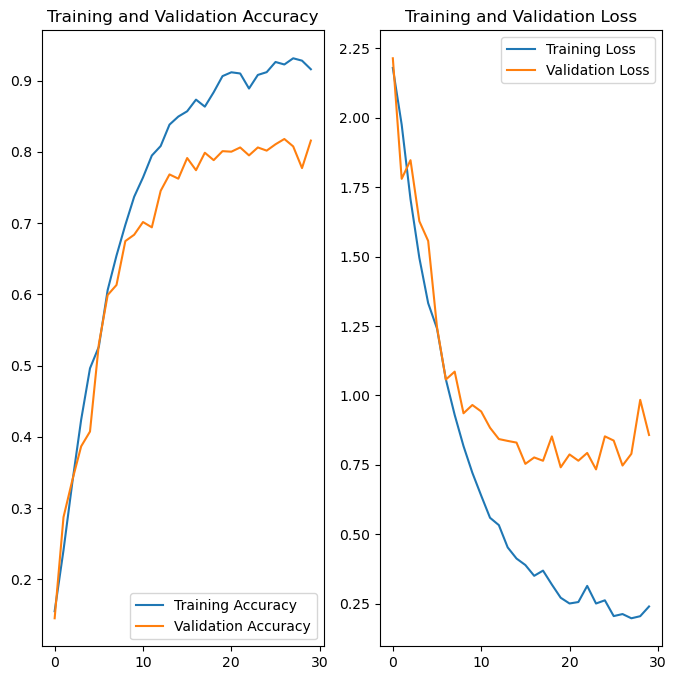

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**Detailed Analysis**:
**Accuracy Trends**:

**Training Accuracy** increased consistently, starting at 21.16% and reaching 89.6% in 30th epoch.
**Validation Accuracy** improved steadily, starting from  38.1% and reaching 85.5% in 30th epoch.

**Loss**:

**Training Loss** decreased significantly, indicating better performance and reduced error as training progressed.
**Validation Loss** Validation loss initially improved but showed minor fluctuations after epoch 16, possibly due to slight overfitting.

**Evaluation**:

It has been seen that training and validation accuracies have improved significantly from previous two attempts. The training loss and validation loss are also decreasing consistently, indicating the model is learning well.

We can say that performance and accuracy of the model has improved significantly after implementing **Data Augmentation** and **Class Rebalancing**.

There is indication of slight overfitting but  the good part is that Validation and training metrics are close.

